## June 2020
Consider the dataset countries.csv : prepare a dimensionality reduction planar projection (using the method you rate as the most adequate), color the countries according to your preferred grouping and comment one or more facts emerging from the plot.

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('countries.csv', decimal = ',')
df = df.dropna(axis = 0)
countries = df.Country
regions = df.Region
df = df.drop(['Country', 'Region'], axis = 1)

In [4]:
df['Climate'] = pd.Categorical(df.Climate.transform(lambda x : int(x)))

In [5]:
feat_cols = ['Area (sq. mi.)', 'GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Agriculture', 'Industry', 'Service']

df['y'] = df.Climate

In [6]:
np.random.seed(42)

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]

print(f'Explained variation for components : {pca.explained_variance_ratio_}')

Explained variation for components : [9.99952476e-01 4.75240282e-05]


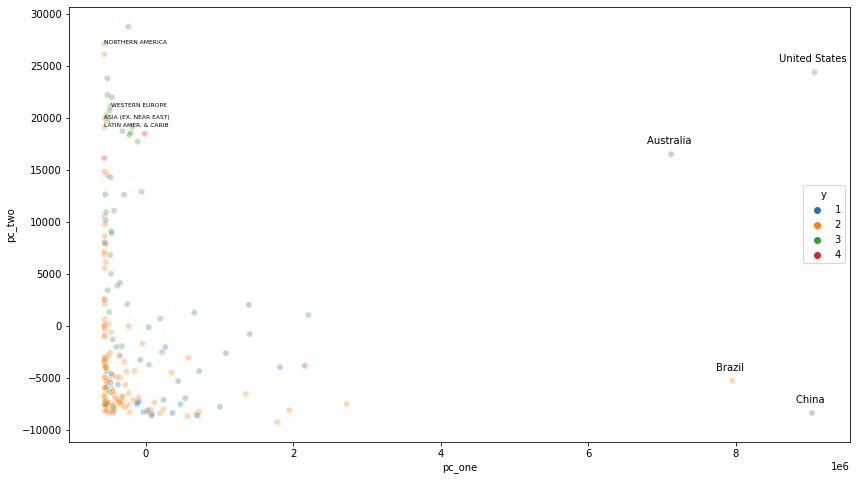

In [7]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, 
                y = df.pc_two, 
                hue = df.y,
                palette = sns.color_palette('tab10', len(df.y.unique())),
                legend = 'full', 
                alpha = 0.3, 
                markers = True)

inserted = []

for i in df.index:
    one = df.loc[i, 'pc_one']
    #print(one)
    two = df.loc[i, 'pc_two']
    if one > 4e6:
        plt.annotate(f'{countries[i]}', xy = (one, two + 1000), ha = 'center')
    if two > 17e3 and regions[i] not in inserted:
        plt.annotate(f'{regions[i]}', xy = (one, two), fontsize = 6, ha = 'left')
        inserted.append(regions[i])

plt.show()

## July 2020
Consider the dataset parkinson.csv, including 756 samples (rows) described by 754 features (columns), plus the last binary column (class) indicating whether the sample is a patient (class 1) or an healthy control (class 0). Using a dimensionality reduction planar projection on the 754 describing features (using the method you rate as the most adequate), color the samples according to their class and discuss if the patients and controls can be separated into two distinct groups in the projection.

In [8]:
df = pd.read_csv('Parkinson.csv')

In [9]:
#shuffle dataset

df = df.sample(frac = 1, random_state = 42)
df.drop('id', axis = 1, inplace = True)

In [10]:
col_names = df.columns[1:-1]
normalized = (df[col_names] - df[col_names].min())/(df[col_names].max() - df[col_names].min())
normalized.shape

(756, 752)

In [12]:
new_normalized = normalized.copy
normalized['gender'] = df.gender
normalized['y'] = df['class']

In [13]:
pca = PCA(n_components = 2, random_state = 42)

pca_result = pca.fit_transform(normalized.iloc[:, :-1])
#print(pca_result)
pca.explained_variance_ratio_

array([0.18756015, 0.12677269])

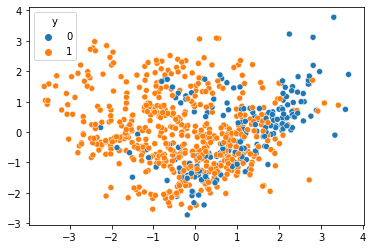

In [14]:
sns.scatterplot(x = pca_result[:, 0],
                y = pca_result[:, 1],
                hue = normalized.y,
                palette = sns.color_palette('tab10', 2),
                legend = 'full')

plt.show()

In [15]:
from sklearn.manifold import MDS

In [16]:
embedding = MDS(n_components = 2, random_state = 42, metric = True, dissimilarity = 'euclidean', n_jobs = 1)

X_trans = embedding.fit_transform(normalized.iloc[:, :-1])

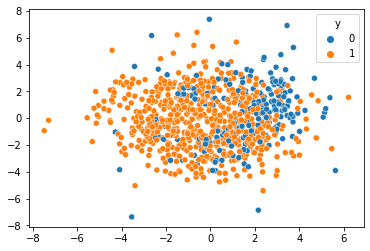

In [17]:
sns.scatterplot(x = X_trans[:, 0],
                y = X_trans[:, 1],
                hue = normalized.y,
                palette = sns.color_palette('tab10', 2),
                legend = 'full')

plt.show()

## Sept-2020
Consider the synthetic dataset madelon.csv, collecting 2000 samples (rows) described by 500 features (columns) and belonging to two classes (1 or -1) defined by the last column. Using the PCA dimensionality reduction planar (2D) projection on the 500 describing features, color the samples according to their class and discuss if the patients and controls can be well separated into two distinct groups in the projection. Repeat the same process with the UMAP algorithm and compare the two results

In [18]:
df = pd.read_csv('madelon.csv', sep = ' ', header = None)


df.columns = [f'var{i}' for i in range(0, 501)]


df['class'] = df.loc[:, 'var500']

df.drop(labels = 'var500', axis = 1, inplace = True)

In [19]:
var_names = df.columns[:-1]

In [20]:
normalized = (df[var_names] - df[var_names].min()) / (df[var_names].max() - df[var_names].min())

In [21]:
pca = PCA(n_components = 2)

results = pca.fit_transform(normalized[var_names].values)

pca.explained_variance_ratio_

array([0.01669465, 0.0122698 ])

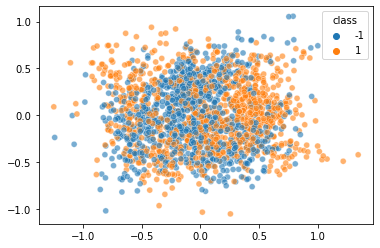

In [22]:
sns.scatterplot(x = results[:, 0],
                y = results[:, 1],
                hue = df['class'],
                palette = sns.color_palette('tab10', 2),
                legend = 'full',
                alpha = 0.6)

plt.show()

In [23]:
import umap
import numpy as np

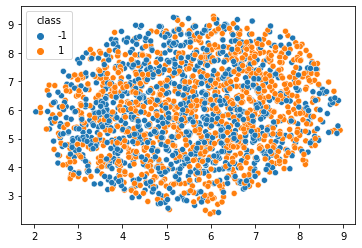

In [25]:
#set parameters neighbors and min_dist to be used

reducer = umap.UMAP(n_neighbors = 5, min_dist = 0.25, random_state = 42)

embedding = reducer.fit_transform(normalized)

sns.scatterplot(x = embedding[:, 0], y = embedding[:, 1], hue = df['class'], palette = sns.color_palette('tab10', 2))

plt.show()

## January-2021
Consider the datafile Leukemia.csv, collecting the expression of 7129 genes of 72 leukemia patients, belonging to 4 different classes B-cell, T-cell, BM, BP , as indicated in the last column of the .csv file. Using the tSNE dimensionality reduction planar (2D) projection on the 7129 describing features, color the samples according to their class and discuss if the 4 groups of patients can be well separated into two distinct groups in the projection. Repeat the same process with the MDS algorithm and compare the two results.

In [28]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [29]:
df = pd.read_csv('Leukemia.csv')

In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.iloc[:,:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.000s...
[t-SNE] Computed neighbors for 72 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 38964.701154
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.558449
[t-SNE] KL divergence after 300 iterations: 0.977955
t-SNE done! Time elapsed: 0.12188076972961426 seconds


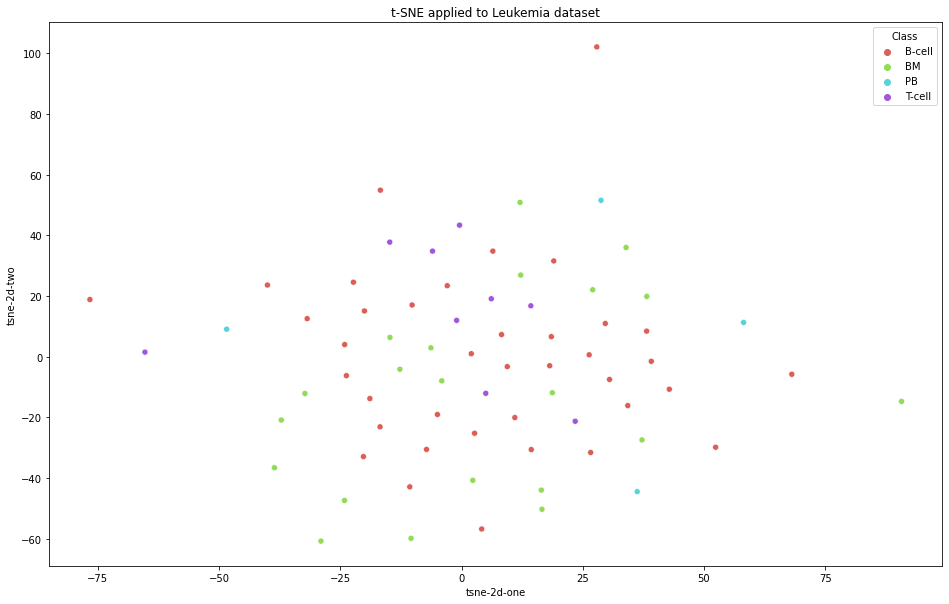

In [31]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df["Class"],
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
    alpha= 1
)
plt.title('t-SNE applied to Leukemia dataset')
plt.show()

In [32]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

In [33]:
df = pd.read_csv('Leukemia.csv')

In [34]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df.iloc[:,:-1])

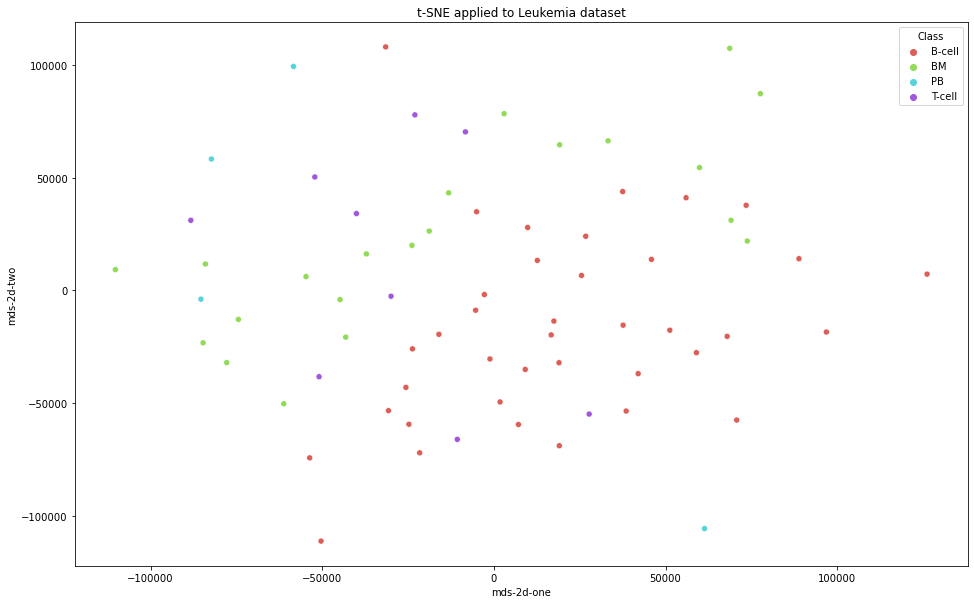

In [36]:
df['mds-2d-one'] = X_transformed[:,0]
df['mds-2d-two'] = X_transformed[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="mds-2d-one", 
    y="mds-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
    alpha= 1
)
plt.title('t-SNE applied to Leukemia dataset')
plt.show()

## February 2021
Consider the datafile microbiome.csv, collecting the abundances of 6696 bacterial species (OTU) of 675 patients. Prepare a set of at least 5 plots with the 2D projection of the dataset by using the UMAP algorithm, varying the number of neighbours parameter in the range 5-200 and the minimum distance parameter and discuss in details the different shapes resulting in the projected plots.

In [37]:
df = pd.read_csv('madelon.csv', sep = ' ', header = None)
#df.head()

In [38]:
df.columns = [f'var{i}' for i in range(0, 501)]


df['class'] = df.loc[:, 'var500']

df.drop(labels = 'var500', axis = 1, inplace = True)

In [39]:
var_names = df.columns[: -1]

In [40]:
normalized = (df[var_names] - df[var_names].min()) / (df[var_names].max() - df[var_names].min())

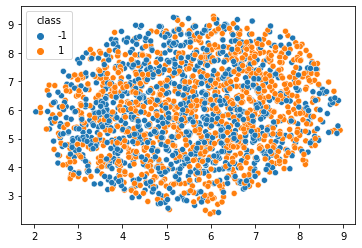

In [41]:
#set parameters neighbors and min_dist to be used

reducer = umap.UMAP(n_neighbors = 5, min_dist = 0.25, random_state = 42)

embedding = reducer.fit_transform(normalized)

sns.scatterplot(x = embedding[:, 0], 
                y = embedding[:, 1], 
                hue = df['class'], 
                palette = sns.color_palette('tab10', 2),
                alpha = 1)

plt.show()